# Pytorch

In a previous workshop, you learned how to use Numpy to simply manage matrices in Python.
In order to make the creation of neural networks easier and faster, we will learn to use Pytorch, a library created by Meta AI.

In [ ]:
# Import PyTorch
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 1. Tensors

Pytorch makes it very easy to use the GPU to perform matrix calculations more quickly without having to write additional code.
Pytorch proposes an overlay to the Numpy arrays called Tensor. More simply, a Pytorch tensor is a Numpy matrix whose operations can be calculated on the GPU.

Let's create our first tensor !

In [ ]:
# Create a Tensor filled with 0 (we can also create a tensor filled with 1 using torch.ones())
x = torch.zeros(3, 4)

print(x)
print(x.shape)

In [ ]:
# Create a Tensor filled with random values (between 0 and 1)
y = torch.rand(3, 4)

print(y)
print(y.shape)

In [ ]:
# We can apply arithmetics operations on tensors

print(y)
print(y + 1)
print(y * 3)

There are many other operations that can be applied to tensors but we won't need them here. You can find out more about tensors by following this link: [Pytorch Tensors](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

## 2. First Neural Network

Let's create our first neural network. In PyTorch, our model is broken down into modules, knowing that each module can contain several others.
Let's define our first module with the set of operations it will have to perform.

We will define our first module and several functions that we will use in our model. Pytorch already integrates many useful functions in AI optimized for Tensor.

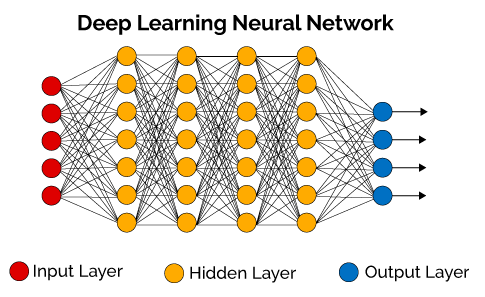

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        # Create two linear layers (10 inputs, 5 neurons in hidden layer, 1 output)
        self.linear1 = nn.Linear(10, 5)
        self.linear2 = nn.Linear(5, 1)        

    def forward(self, input):
        # Apply first linear transformation
        output = self.linear1(input)
        # Apply activation function
        output = F.relu(output)
        
        # Apply second linear transformation
        output = self.linear2(output)
        # Apply activation function
        output = F.relu(output)
        return output

We create the instance of our model and load CUDA if available !

> CUDA (or Compute Unified Device Architecture) is a parallel computing platform and application programming interface (API) that allows software to use certain types of graphics processing units (GPUs) for general purpose processing, an approach called general-purpose computing on GPUs

In [ ]:
network = Network()

# Load CUDA if available
if torch.cuda.is_available():
    network.cuda()
print("Used device: {}".format('GPU with CUDA' if torch.cuda.is_available() else 'CPU'))

In [ ]:
EPOCH = 32
BATCH_SIZE = 10
LEARNING_RATE = 0.1

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=LEARNING_RATE)

Criterion will be used to calculate the loss between the result obtained and the expected result of the network.   
Optimizer will be used to modify our network to get closer to the expected result.

## 3. Data

For this workshop, we will use fairly simple data so that everyone can understand.   
In a real case, the dataset and the number of epochs would be much (much) larger.

In [ ]:
# Input data (randomly generated here)
x = torch.randn(BATCH_SIZE, 10)
# Target data
target = torch.tensor([[1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])

## 4. Training

Now it's time to train our model! At the moment, our model is making random predictions (which is already a good start, it means that our data is getting through).  
  
We will collect the loss and accuracy of each epoch to see if our network improves its predictions or if there is a problem.

In [ ]:
loss_history = np.zeros(EPOCH)
accuracy_history = np.zeros(EPOCH)

for epoch in range(EPOCH):
    # Reset gradiants
    optimizer.zero_grad()
    # Forward
    y = network(x)
    # Compute loss
    loss = criterion(y, target)
    # Compute gradiants
    loss.backward()
    # Apply gradiants
    optimizer.step()
    
    # Monitoring
    success = (y == target).sum()
    total = y.size(0)
    loss_history[epoch] = loss.item()
    accuracy_history[epoch] = success.item() / total
    # print("Epoch {} - Loss {} - Accuracy {}".format(epoch, loss.item(), success.item() / total))

We are going to use matplotlib (a library allowing to draw graphs) in order to visualize more simply the measurements made during the training.

In [ ]:
plt.plot(np.arange(1, EPOCH + 1), loss_history)
plt.plot(np.arange(1, EPOCH + 1), accuracy_history)
plt.show()